In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
data = pd.read_csv('/content/data.csv')
target = pd.read_csv('/content/target.csv')

In [ ]:
data.head()

,Minute,Hour,Day,Month,Year,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction,maxtempC,windGustKmph,DewPointC,windChillC,humidity,pressure
0,0,0,1,12,2018,6.166973,681.780444,47.659679,6,13.666667,3.0,3.0,85.916667,1022.916667
1,10,0,1,12,2018,5.884330,586.656800,49.751839,6,13.666667,3.0,3.0,85.916667,1022.916667
2,20,0,1,12,2018,5.168109,378.397651,54.350288,6,13.666667,3.0,3.0,85.916667,1022.916667
3,30,0,1,12,2018,4.607421,245.089872,53.266201,6,13.666667,3.0,3.0,85.916667,1022.916667
4,40,0,1,12,2018,4.713554,268.621965,51.365490,6,13.666667,3.0,3.0,85.916667,1022.916667


In [ ]:
data["Output_Energy"] = target["LV ActivePower"]
data.head()

,Minute,Hour,Day,Month,Year,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction,maxtempC,windGustKmph,DewPointC,windChillC,humidity,pressure,Output_Energy
0,0,0,1,12,2018,6.166973,681.780444,47.659679,6,13.666667,3.0,3.0,85.916667,1022.916667,57.407021
1,10,0,1,12,2018,5.884330,586.656800,49.751839,6,13.666667,3.0,3.0,85.916667,1022.916667,27.440510
2,20,0,1,12,2018,5.168109,378.397651,54.350288,6,13.666667,3.0,3.0,85.916667,1022.916667,0.364866
3,30,0,1,12,2018,4.607421,245.089872,53.266201,6,13.666667,3.0,3.0,85.916667,1022.916667,0.000000
4,40,0,1,12,2018,4.713554,268.621965,51.365490,6,13.666667,3.0,3.0,85.916667,1022.916667,0.000000


In [ ]:
df=data[["Wind Speed (m/s)","Wind Direction","maxtempC","humidity","pressure","Output_Energy"]]
df.head()

,Wind Speed (m/s),Wind Direction,maxtempC,humidity,pressure,Output_Energy
0,6.166973,47.659679,6,85.916667,1022.916667,57.407021
1,5.884330,49.751839,6,85.916667,1022.916667,27.440510
2,5.168109,54.350288,6,85.916667,1022.916667,0.364866
3,4.607421,53.266201,6,85.916667,1022.916667,0.000000
4,4.713554,51.365490,6,85.916667,1022.916667,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4447 entries, 0 to 4446
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Wind Speed (m/s)  4447 non-null   float64
 1   Wind Direction    4447 non-null   float64
 2   maxtempC          4447 non-null   int64  
 3   humidity          4447 non-null   float64
 4   pressure          4447 non-null   float64
 5   Output_Energy     4447 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 208.6 KB


In [ ]:
df.describe()

,Wind Speed (m/s),Wind Direction,maxtempC,humidity,pressure,Output_Energy
count,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000
mean,7.357389,140.667803,8.535192,78.648874,1019.491652,1176.785881
std,4.361162,93.616266,3.034301,9.004574,5.154328,1374.223232
min,0.000000,0.000000,4.000000,54.125000,1004.541667,-1.077131
25%,3.669025,53.272396,6.000000,74.000000,1015.875000,0.000000
50%,6.717962,143.424896,8.000000,80.041667,1020.833333,482.019714
75%,10.197950,206.816154,12.000000,84.708333,1023.458333,2289.062988
max,21.621000,359.942291,14.000000,93.958333,1028.208333,3602.782959


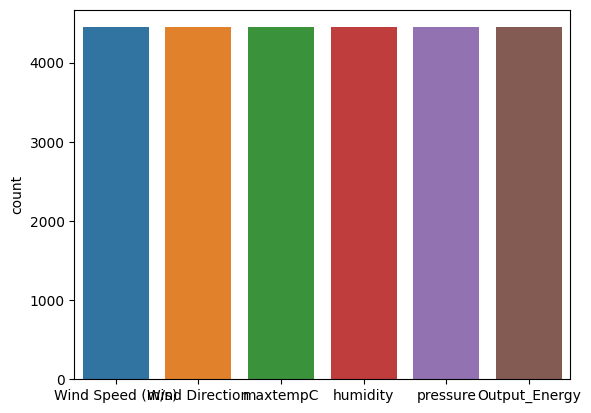

In [ ]:
sns.countplot(df)
plt.show()

In [ ]:
# Scaler = StandardScaler()
# for col in df.columns:
#   if col != 'Output_Energy':
#     df[col] = Scaler.fit_transform(df[[col]])

# df.head()

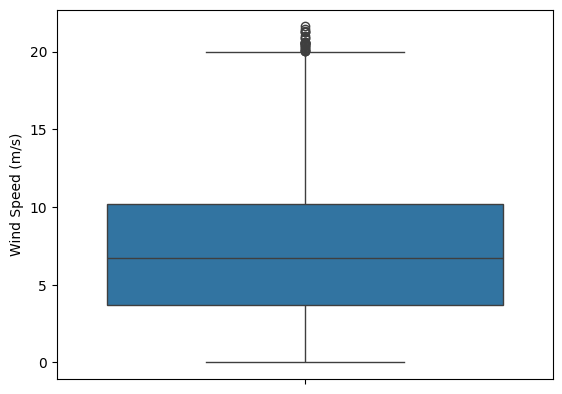

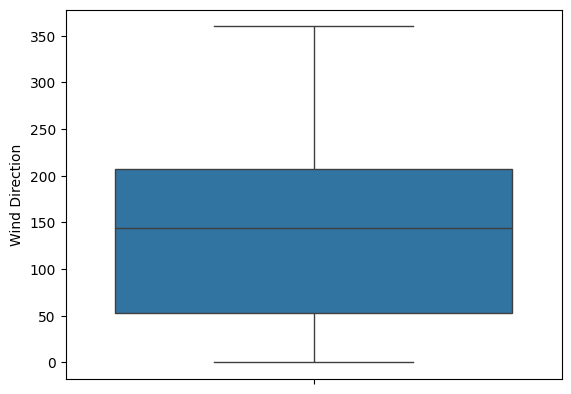

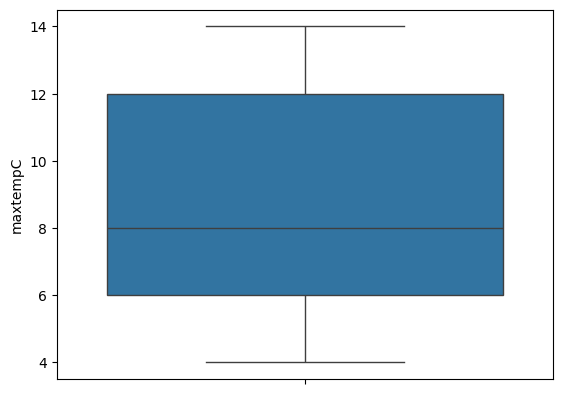

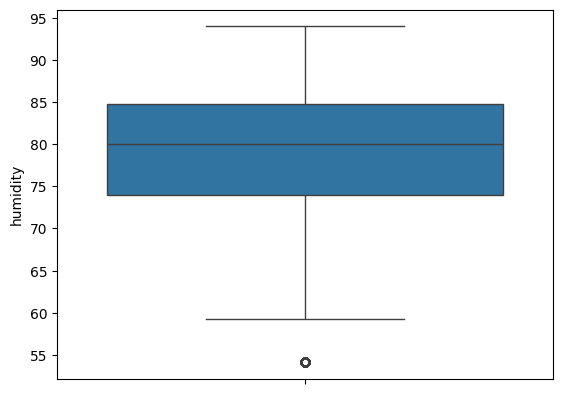

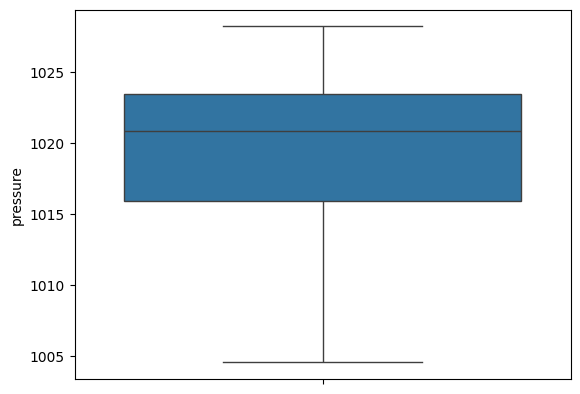

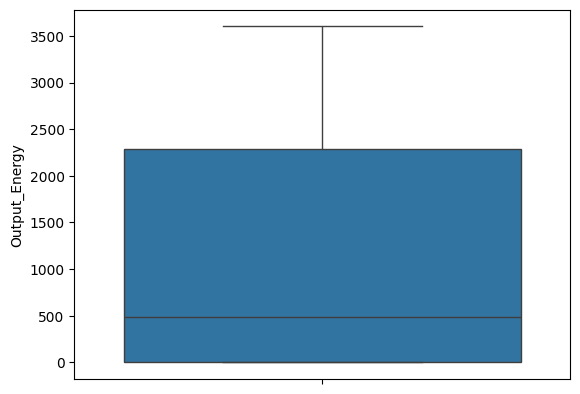

In [ ]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

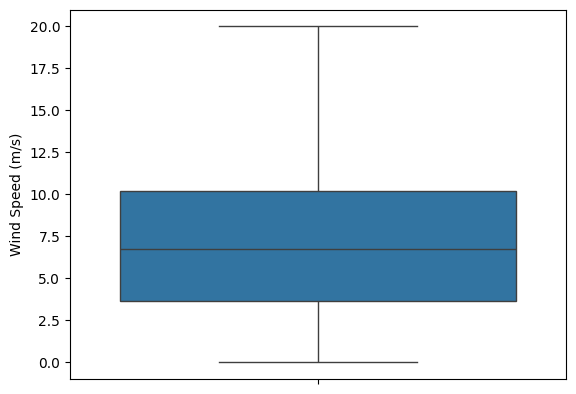

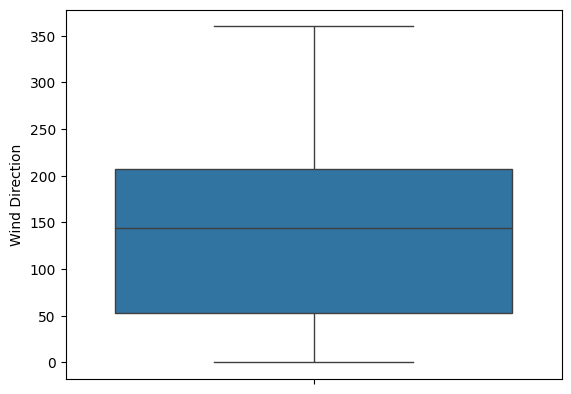

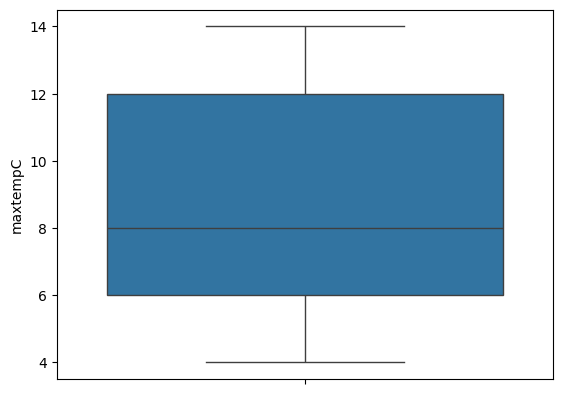

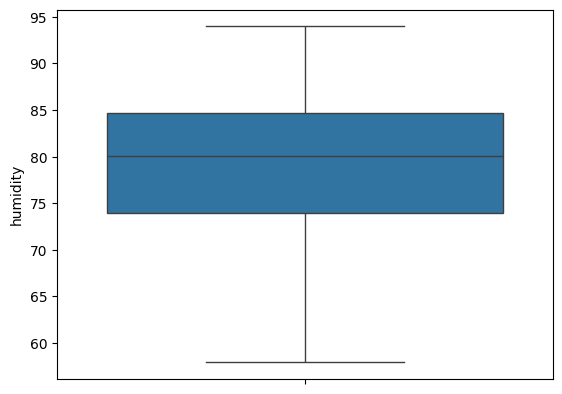

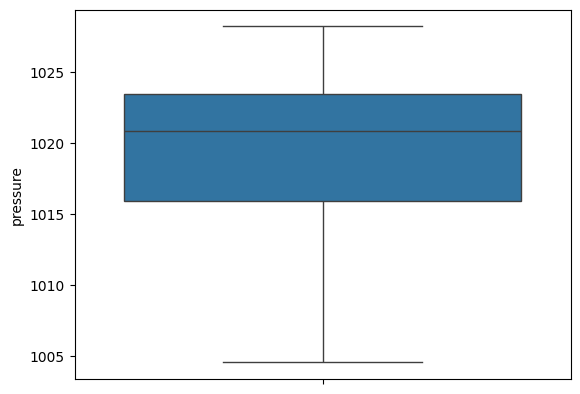

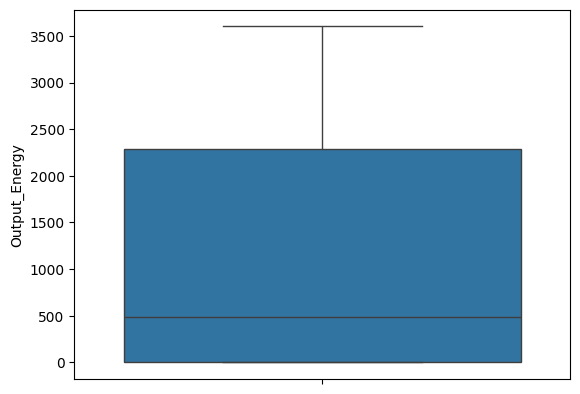

In [ ]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])
    df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])

for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

In [ ]:
df.corr()

,Wind Speed (m/s),Wind Direction,maxtempC,humidity,pressure,Output_Energy
Wind Speed (m/s),1.000000,0.017336,0.339107,-0.151853,-0.234967,0.882457
Wind Direction,0.017336,1.000000,0.080762,-0.313542,-0.020962,0.122913
maxtempC,0.339107,0.080762,1.000000,-0.065329,-0.597324,0.403382
humidity,-0.151853,-0.313542,-0.065329,1.000000,-0.129295,-0.251067
pressure,-0.234967,-0.020962,-0.597324,-0.129295,1.000000,-0.249726
Output_Energy,0.882457,0.122913,0.403382,-0.251067,-0.249726,1.000000


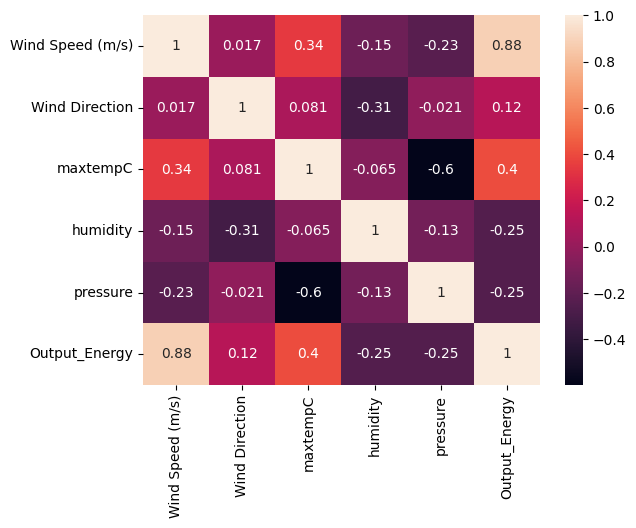

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

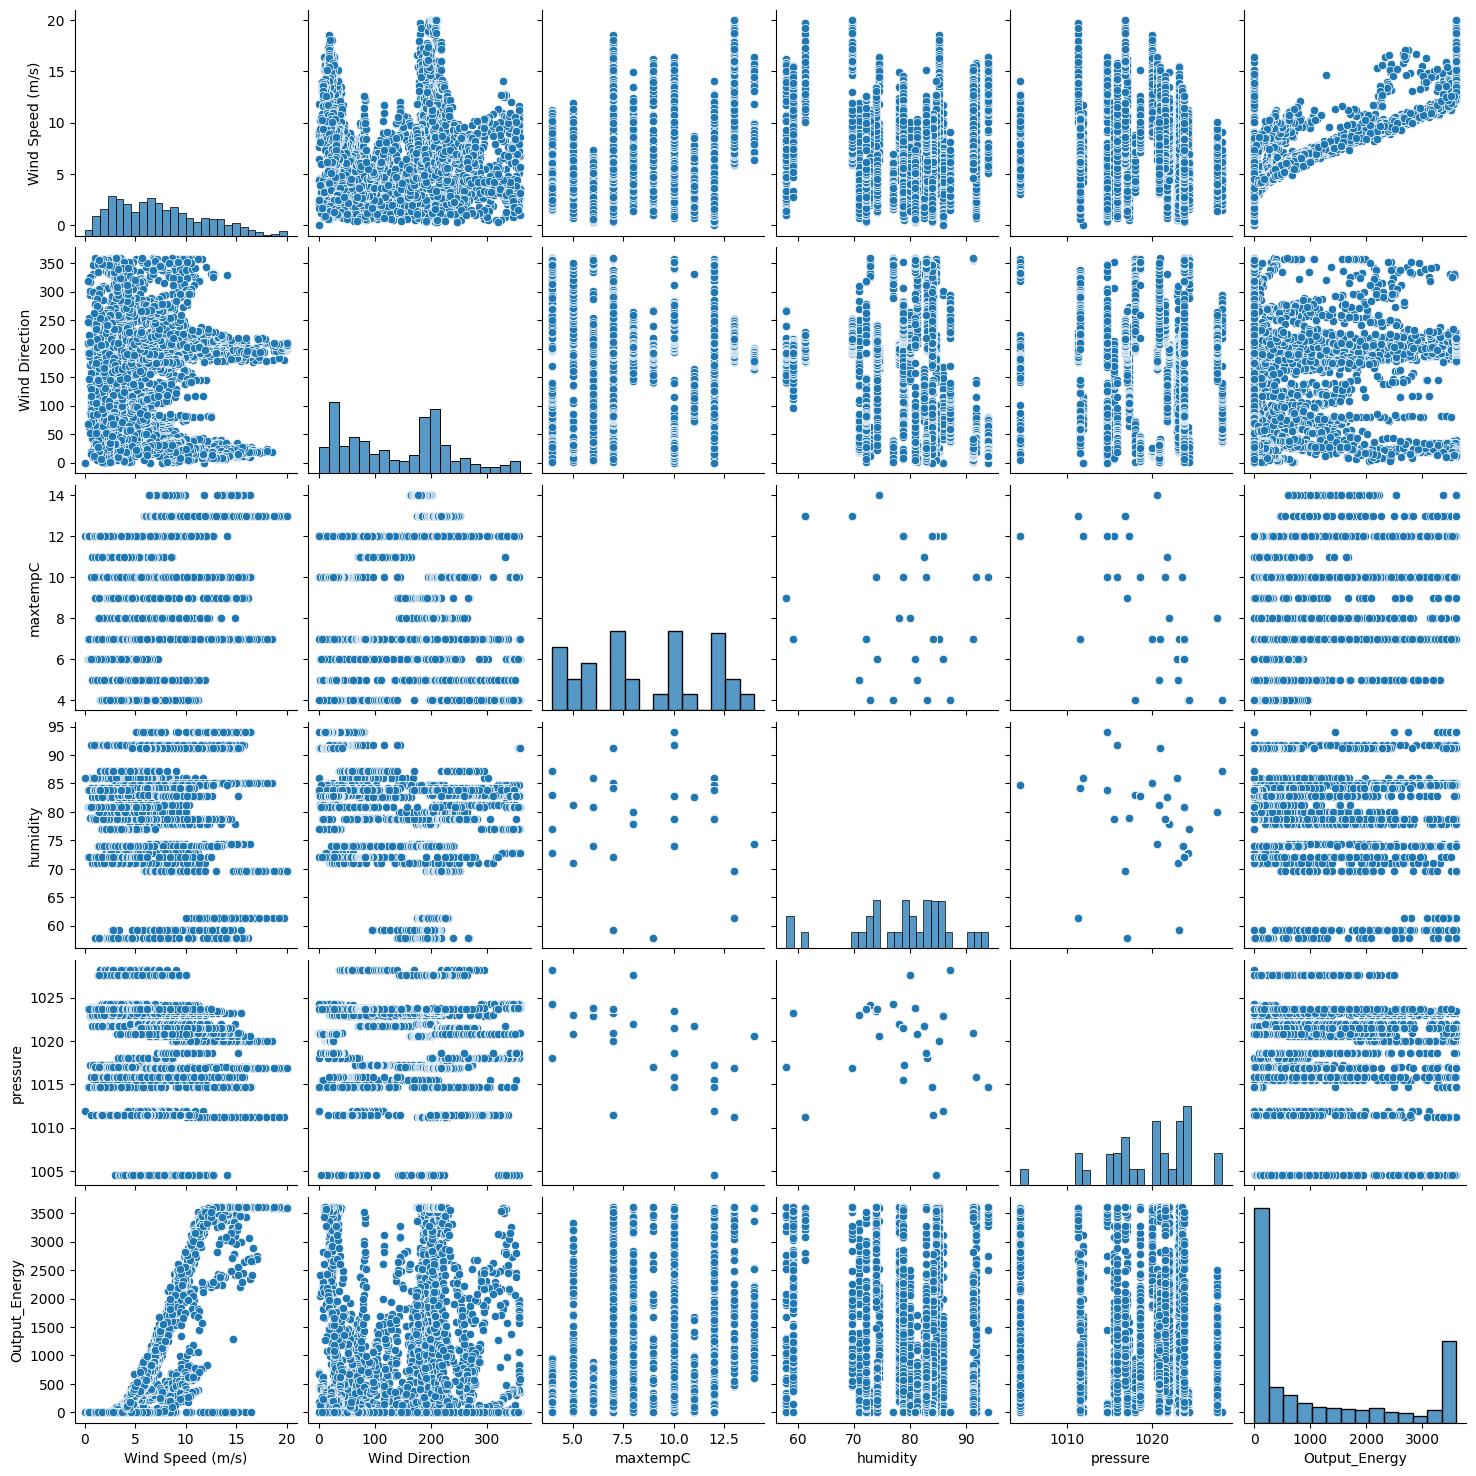

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
x = df.drop("Output_Energy",axis=1)
y = df["Output_Energy"]

In [ ]:
print(x.shape, y.shape)

(4447, 5) (4447,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg_y_pred = linreg.predict(x_test)
print("Mean Squared Error:",mean_squared_error(y_test, linreg_y_pred))
print("R2 Score:",r2_score(y_test, linreg_y_pred))

Mean Squared Error: 360119.04247051076
R2 Score: 0.8116999208318119


In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("R2 Score:",r2_score(y_test, y_pred))

Mean Squared Error: 59501.81102458679
R2 Score: 0.9688875221656801


In [ ]:
df.head()

,Wind Speed (m/s),Wind Direction,maxtempC,humidity,pressure,Output_Energy
0,6.166973,47.659679,6.0,85.916667,1022.916667,57.407021
1,5.884330,49.751839,6.0,85.916667,1022.916667,27.440510
2,5.168109,54.350288,6.0,85.916667,1022.916667,0.364866
3,4.607421,53.266201,6.0,85.916667,1022.916667,0.000000
4,4.713554,51.365490,6.0,85.916667,1022.916667,0.000000


In [ ]:
print(rf.predict([[6.166973,	47.659679,	6.0,	85.916667,	1022.916667]]))  #	57.407021

[95.55435192]


In [ ]:
# param_dist = {
#     'n_estimators': [int(x) for x in np.linspace(start=10, stop=200, num=20)],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100,
#                                    cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the data
# random_search.fit(x_train, y_train)

# Get the best parameters and best estimator
# best_params = random_search.best_params_
# best_estimator = random_search.best_estimator_
# random_search_y_pred = best_estimator.predict(x_test)
# print(r2_score(y_test, random_search_y_pred))
# rs=random_search.predict(x_test)
# print(r2_score(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.9727779557631026
0.9674796085833655


In [ ]:
df.head()

,Wind Speed (m/s),Wind Direction,maxtempC,humidity,pressure,Output_Energy
0,6.166973,47.659679,6.0,85.916667,1022.916667,57.407021
1,5.884330,49.751839,6.0,85.916667,1022.916667,27.440510
2,5.168109,54.350288,6.0,85.916667,1022.916667,0.364866
3,4.607421,53.266201,6.0,85.916667,1022.916667,0.000000
4,4.713554,51.365490,6.0,85.916667,1022.916667,0.000000


In [ ]:
print(best_estimator.predict([[-0.272989,	-0.993616,	-0.835605,	0.807213,	0.664568]]))  #	57.407021

[462.30919161]


In [ ]:
print(best_estimator.predict([[4.607421, 53.266201,	6,	85.916667,	1022.916667]])) #	0.000000

[0.94748987]


In [ ]:
svm = SVR()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

2372344.4934490505
-0.2404583019717752


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
print(r2_score(y_test, y_pred))

0.9593731883817388


In [ ]:
import pickle
pickle.dump(gbr,open('model.pkl','wb'))
pickle.dump(rf,open('Scaler.pkl','wb'))




In [ ]:
df.head()

,Wind Speed (m/s),Wind Direction,maxtempC,humidity,pressure,Output_Energy
0,6.166973,47.659679,6.0,85.916667,1022.916667,57.407021
1,5.884330,49.751839,6.0,85.916667,1022.916667,27.440510
2,5.168109,54.350288,6.0,85.916667,1022.916667,0.364866
3,4.607421,53.266201,6.0,85.916667,1022.916667,0.000000
4,4.713554,51.365490,6.0,85.916667,1022.916667,0.000000


In [ ]:
model = pickle.load(open('model.pkl','rb'))
scaler = pickle.load(open('Scaler.pkl','rb'))


In [ ]:
model.predict([[-0.337806,	-0.971265,	-0.835605,	0.807213,	0.664568]])

array([393.06621136])